In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
macro_data = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(macro_data.shape)  
macro_data.head()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


In [7]:
macro_data[macro_data.columns[0]]

date
1959-01-01    1606.4
1959-04-01    1637.0
1959-07-01    1629.5
1959-10-01    1643.4
1960-01-01    1671.6
               ...  
1988-07-01    4042.7
1988-10-01    4069.4
1989-01-01    4106.8
1989-04-01    4132.5
1989-07-01    4162.9
Name: rgnp, Length: 123, dtype: float64

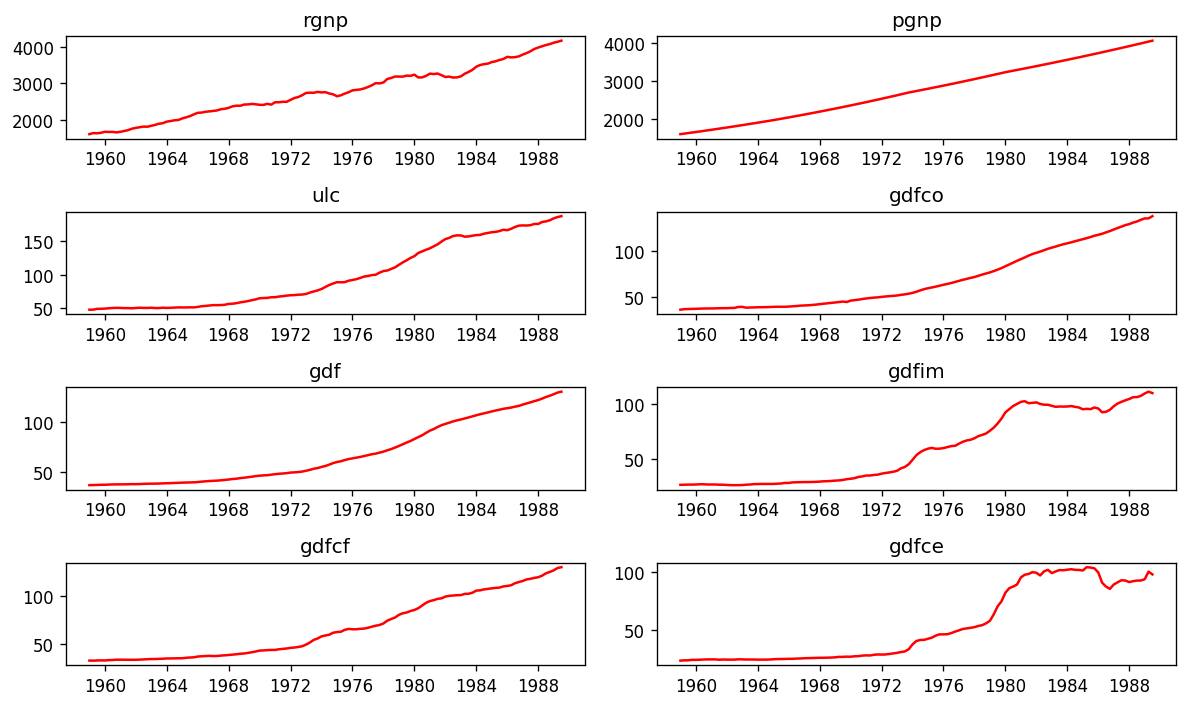

In [12]:
fig,axes=plt.subplots(nrows=4,ncols=2,dpi=120,figsize=(10,6))
for i,ax in enumerate(axes.flatten()):
    data=macro_data[macro_data.columns[i]]
    ax.plot(data,color='red')
    ax.set_title(macro_data.columns[i])

plt.tight_layout();

In [13]:
# ADF useful for checking data has stationary series or not

ad_fuller_result_1=adfuller(macro_data['rgnp'])
print('rgnp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2=adfuller(macro_data['ulc'])
print('ulc')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

ad_fuller_result_3=adfuller(macro_data['gdf'])
print('gdf')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')

print('\n---------------------\n')

ad_fuller_result_4=adfuller(macro_data['gdfcf'])
print('gdfcf')
print(f'ADF Statistic: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')

print('\n---------------------\n')

rgnp
ADF Statistic: 0.6418816546694854
p-value: 0.9886037114305949

---------------------

ulc
ADF Statistic: 1.396716182861662
p-value: 0.9970991728829679

---------------------

gdf
ADF Statistic: 1.1128604139509413
p-value: 0.9953249001658118

---------------------

gdfcf
ADF Statistic: 1.6692549725917183
p-value: 0.998051164027281

---------------------



In [16]:
#Not following statinary so take the difference of it own value to convert a stationary
ad_fuller_result_1=adfuller(macro_data['rgnp'].diff()[1:])
print('rgnp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2=adfuller(macro_data['ulc'].diff()[1:])
print('ulc')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')


rgnp
ADF Statistic: -5.427594381007334
p-value: 2.9633019848468996e-06

---------------------

ulc
ADF Statistic: -3.5760804731509115
p-value: 0.006235131830238156

---------------------



In [17]:
#Useful to chekc  One Time Series Is Impacting in Predicting Another
print('rgnp causes ulc?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['ulc', 'rgnp']], 4)

print('\nulc causes rgnp?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['rgnp', 'ulc']], 4)
     

rgnp causes ulc?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=22.9444 , p=0.0000  , df=1
likelihood ratio test: chi2=21.0242 , p=0.0000  , df=1
parameter F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=16.1029 , p=0.0003  , df=2
likelihood ratio test: chi2=15.1179 , p=0.0005  , df=2
parameter F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.5231  , p=0.0001  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=23.9675 , p=0.0000  , df=3
likelihood ratio test: chi2=21.8515 , p=0.0001  , df=3
parameter F test:         F=7.5231  , p=0.0001  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F

In [21]:
macro_data = macro_data[['ulc','rgnp']]
print(macro_data.shape)


(123, 2)


In [22]:
train_df=macro_data[:-12]#split 12 data for test set
test_df=macro_data[-12:]

In [24]:
model = VAR(train_df.diff()[1:])

In [33]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.778       6.834       878.3       6.800
1        5.988      6.154*       398.5       6.055
2        5.942       6.220       380.9       6.054
3        5.933       6.322       377.4       6.090
4       5.793*       6.293      328.5*      5.995*
5        5.873       6.484       356.3       6.120
6        5.828       6.550       341.1       6.119
7        5.894       6.727       365.0       6.230
8        5.890       6.835       364.8       6.271
9        5.942       6.998       385.8       6.368
10       5.930       7.097       382.9       6.401
11       5.913       7.191       378.5       6.428
12       5.885       7.274       370.7       6.445
13       5.925       7.424       388.6       6.529
14       5.882       7.493       376.0       6.532
15       5.950       7.672       406.9       6.644
16       5.933       7.766     

In [35]:
sorted_order=model.select_order(maxlags=20)
optimal_lag = sorted_order.aic
var_model = model.fit(optimal_lag)
print(var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, Jul, 2024
Time:                     17:13:01
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    5.98996
Nobs:                     106.000    HQIC:                   5.72099
Log likelihood:          -576.312    FPE:                    254.297
AIC:                      5.53768    Det(Omega_mle):         216.051
--------------------------------------------------------------------
Results for equation ulc
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.582681         0.179496           -3.246           0.001
L1.ulc          0.432987         0.124725            3.472           0.001
L1.rgnp         0.009494         0.003476            2.731           0.006
L2.ulc     

In [27]:
# Forecasting
n_steps = 10  # Number of steps to forecast
forecast_input = train_df.diff()[1:].values[-optimal_lag:]
forecast = var_model.forecast(y=forecast_input, steps=n_steps)

# Convert forecast to a DataFrame for better readability
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=train_df.index[-1], periods=n_steps + 1, freq='D')[1:], columns=train_df.columns)
print(forecast_df)

In [28]:
# Convert forecast to a DataFrame for better readability
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=train_df.index[-1], periods=n_steps + 1, freq='D')[1:], columns=train_df.columns)
print(forecast_df)

                 ulc       rgnp
1986-07-02  1.589734  41.346374
1986-07-03  1.460563   4.621899
1986-07-04  1.777822  -2.394604
1986-07-05  1.783072  14.464845
1986-07-06  1.493154  26.066967
1986-07-07  1.436879  15.233175
1986-07-08  1.531378  11.272282
1986-07-09  1.547318  15.413929
1986-07-10  1.457866  19.706194
1986-07-11  1.424396  16.921146


In [29]:
# Inverse differencing
last_observed = train_df.iloc[-1]
forecast_df = forecast_df.cumsum() + last_observed

print(forecast_df)


                   ulc         rgnp
1986-07-02  172.789734  3753.746374
1986-07-03  174.250297  3758.368273
1986-07-04  176.028119  3755.973669
1986-07-05  177.811191  3770.438514
1986-07-06  179.304344  3796.505481
1986-07-07  180.741224  3811.738656
1986-07-08  182.272602  3823.010938
1986-07-09  183.819920  3838.424867
1986-07-10  185.277786  3858.131061
1986-07-11  186.702182  3875.052207


## Varmax

In [30]:
train_df=macro_data[:-12]#split 12 data for test set
test_df=macro_data[-12:]

In [42]:
train_df.columns

Index(['ulc', 'rgnp'], dtype='object')

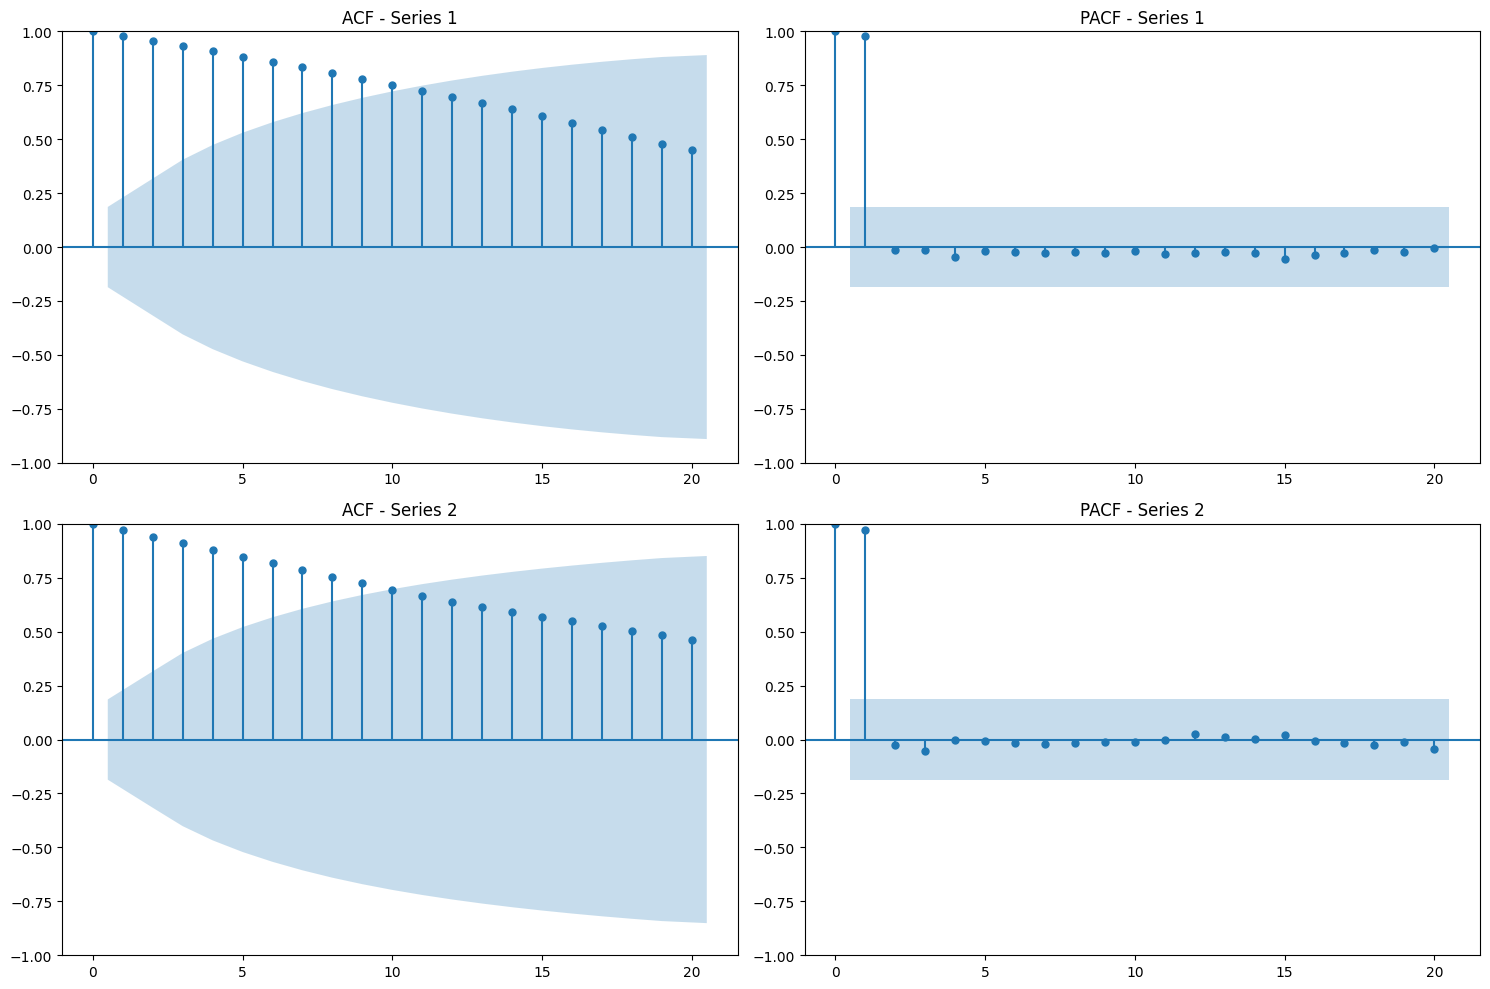

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

plot_acf(train_df['ulc'], lags=20, ax=axes[0, 0])
plot_pacf(train_df['ulc'], lags=20, ax=axes[0, 1])
axes[0, 0].set_title('ACF - Series 1')
axes[0, 1].set_title('PACF - Series 1')

# Series 2 ACF and PACF
plot_acf(train_df['rgnp'], lags=20, ax=axes[1, 0])
plot_pacf(train_df['rgnp'], lags=20, ax=axes[1, 1])
axes[1, 0].set_title('ACF - Series 2')
axes[1, 1].set_title('PACF - Series 2')

plt.tight_layout()
plt.show()

In [32]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:        ['ulc', 'rgnp']   No. Observations:                  111
Model:                         VAR(4)   Log Likelihood              -11821.114
                          + intercept   AIC                          23684.229
Date:                Sun, 07 Jul 2024   BIC                          23741.129
Time:                        17:11:48   HQIC                         23707.312
Sample:                    01-01-1959                                         
                         - 07-01-1986                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):          37.55, 106.10   Jarque-Bera (JB):         22.87, 13.69
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.66, 0.28   Skew:                      0.66, -0.86
Prob(H) (two-sided):            0.13,

In [36]:

n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [37]:
predictions.columns=['ulc_predicted','rgnp_predicted']
predictions

,ulc_predicted,rgnp_predicted
1986-10-01,166.316089,3568.062770
1987-01-01,243.921965,3756.787171
1987-04-01,48.789563,3553.865356
1987-07-01,268.913251,3862.222143
1987-10-01,148.263429,3478.424823
1988-01-01,169.199236,3768.988589
1988-04-01,155.427424,3634.323828
1988-07-01,209.632123,3729.604171
1988-10-01,142.708964,3566.320508
1989-01-01,196.710826,3771.119505


In [38]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)


<Axes: >

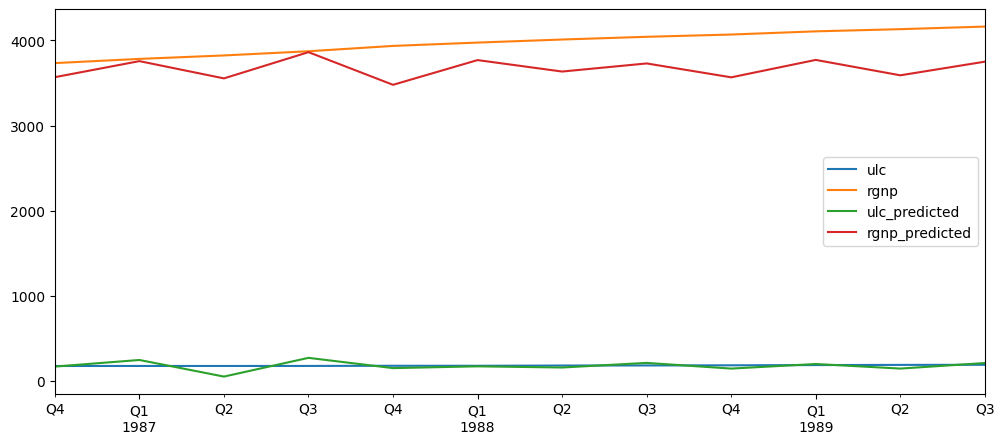

In [39]:
test_vs_pred.plot(figsize=(12,5))


In [40]:
# Quality of time series prediction
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_ulc=math.sqrt(mean_squared_error(predictions['ulc_predicted'],test_df['ulc']))
print('Mean value of ULC is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['ulc']),rmse_ulc))

rmse_rgnp=math.sqrt(mean_squared_error(predictions['rgnp_predicted'],test_df['rgnp']))
print('Mean value of RGNP is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['rgnp']),rmse_rgnp))
     

Mean value of ULC is : 178.56666666666666. Root Mean Squared Error is :54.56636780280896
Mean value of RGNP is : 3970.6916666666666. Root Mean Squared Error is :344.26451991808955
